In [2]:
import tbi

from glob import glob
import nilearn.plotting as plotting
import pandas as pd
from os.path import join
from IPython.display import display

In [3]:
output = '/data/illustration/py-out4'
mni_file = 'illustration_data/MNI152_T1_1mm_brain.nii'
atlas_file = 'illustration_data/New_atlas_cort_asym_sub.nii.gz'
template_file = 'illustration_data/T_template0.nii.gz'
convert_dir = 'illustration_data/convert'

In [4]:
preprocessing_dir = join(output, 'preprocessing')
preprocessing_args = ['-m', 
                      mni_file, 
                      join(convert_dir, '*.nii.gz'), 
                      preprocessing_dir
                     ]
tbi.preprocessing(preprocessing_args)

2020-09-28 16:42:05,153 :: tbi.preprocessing :: INFO :: Using args:Namespace(input='illustration_data/convert/*.nii.gz', mni_file='illustration_data/MNI152_T1_1mm_brain.nii', output='/data/illustration/py-out4/preprocessing')
2020-09-28 16:42:05,168 :: tbi.preprocessing :: INFO :: Processing file illustration_data/convert/ID_0ead008d-ecef2edb6b.nii.gz
2020-09-28 16:42:05,175 :: tbi.utils :: INFO :: fslswapdim illustration_data/convert/ID_0ead008d-ecef2edb6b.nii.gz x -y z /tmp/tmpru_rgd2v/out1.nii.gz
2020-09-28 16:42:08,868 :: tbi.utils :: INFO :: 3dresample -dxyz 1.0 1.0 1.0 -orient RPI -prefix /tmp/tmpru_rgd2v/out2.nii.gz -inset /tmp/tmpru_rgd2v/out1.nii.gz
2020-09-28 16:42:14,333 :: tbi.utils :: INFO :: robustfov -i /tmp/tmpru_rgd2v/out2.nii.gz -r /tmp/tmpru_rgd2v/out3.nii.gz
2020-09-28 16:42:19,422 :: tbi.utils :: INFO :: N4BiasFieldCorrection -d 3 -i /tmp/tmpru_rgd2v/out3.nii.gz -o /tmp/tmpru_rgd2v/out3.nii.gz
2020-09-28 16:43:36,718 :: tbi.utils :: INFO :: antsRegistrationSyN.sh -

Plotting /data/illustration/py-out4/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz


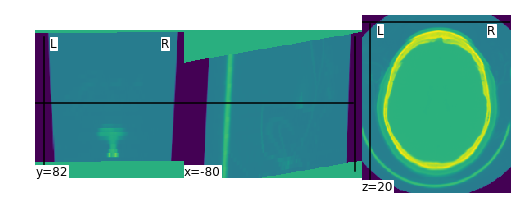

Plotting /data/illustration/py-out4/preprocessing/ID_0ead008d-ecef2edb6b_normalizedInverseWarped.nii.gz


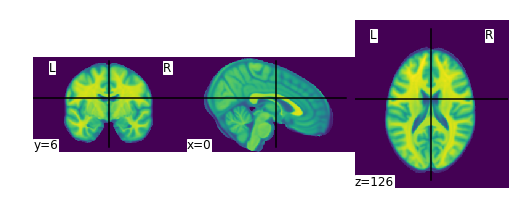

In [5]:
nii_files = glob(join(preprocessing_dir, "*.nii.gz"))

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plotting.plot_img(nii_file)
    plotting.show()

In [6]:
skull_strip_dir = join(output, 'brains')
skull_strip_args = [join(preprocessing_dir, '*_normalizedWarped.nii.gz'),
                    skull_strip_dir
                   ]
tbi.skull_strip(skull_strip_args)

2020-09-28 16:49:17,491 :: tbi.skull_strip :: INFO :: Arguments: Namespace(append='_brain', input='/data/illustration/py-out4/preprocessing/*_normalizedWarped.nii.gz', output='/data/illustration/py-out4/brains', strip='_normalizedWarped')
2020-09-28 16:49:17,565 :: tbi.skull_strip :: INFO :: Processing file /data/illustration/py-out4/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz
2020-09-28 16:49:17,567 :: tbi.skull_strip :: INFO :: Using temp file /tmp/tmpovpx1aji/rescaled.nii
2020-09-28 16:49:17,643 :: tbi.skull_strip :: INFO :: Dropping dimensions image @ /data/illustration/py-out4/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz
2020-09-28 16:49:17,661 :: tbi.skull_strip :: INFO :: Rescaling image @ /data/illustration/py-out4/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz
2020-09-28 16:49:18,640 :: tbi.skull_strip :: INFO :: Calibrating image @ /data/illustration/py-out4/preprocessing/ID_0ead008d-ecef2edb6b_normalizedWarped.nii.gz
2020-09-28 

Plotting /data/illustration/py-out4/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz


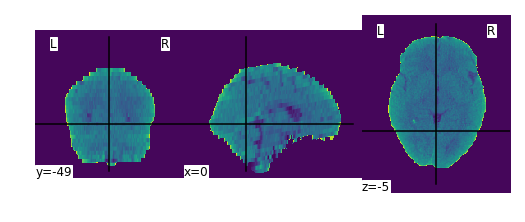

In [7]:
nii_files = glob(join(skull_strip_dir, "*.nii.gz"))

for nii_file in nii_files:
    print('Plotting {0}'.format(nii_file))
    plotting.plot_img(nii_file)
    plotting.show()

In [8]:
brains = join(skull_strip_dir, '*.nii.gz')
segmentation_dir = join(output, 'segmentation')
segmentation_args = ['-t', 
                     template_file, 
                     '-a', 
                     atlas_file, 
                     brains, 
                     segmentation_dir
                    ]

tbi.segmentation(segmentation_args)

2020-09-28 16:49:37,739 :: tbi.segmentation :: INFO :: Arguments: Namespace(atlas_file='illustration_data/New_atlas_cort_asym_sub.nii.gz', input='/data/illustration/py-out4/brains/*.nii.gz', output='/data/illustration/py-out4/segmentation', template_file='illustration_data/T_template0.nii.gz')
2020-09-28 16:49:37,767 :: tbi.segmentation :: INFO :: Processing /data/illustration/py-out4/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz
2020-09-28 16:49:37,778 :: tbi.segmentation :: INFO :: Registering /data/illustration/py-out4/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz
2020-09-28 16:49:37,784 :: tbi.utils :: INFO :: antsRegistrationSyNQuick.sh -d 3 -n 4 -f illustration_data/T_template0.nii.gz -m /data/illustration/py-out4/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz -o /data/illustration/py-out4/segmentation/REGIS/SyN/ID_0ead008d-ecef2edb6b_preprocessed_SyN
2020-09-28 16:53:38,668 :: tbi.utils :: INFO :: antsRegistrationSyNQuick.sh -d 3 -n 4 -f illustration_data/T_template0.nii.gz -m /data/illus

/data/illustration/py-out4/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz


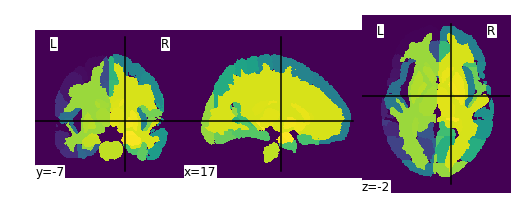

/data/illustration/py-out4/segmentation/SEG/AFFINE/ID_0ead008d-ecef2edb6b_segmentation_cortical_affine.nii.gz


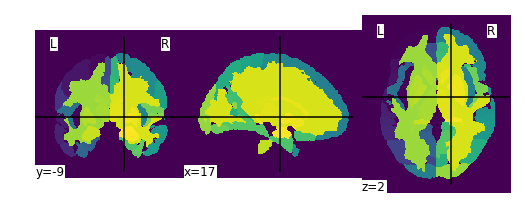

In [9]:
nii_files = glob(join(segmentation_dir, 'SEG/*/*.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    plotting.plot_img(nii_file)
    plotting.show()

In [10]:
label_geometry_measures_dir = join(output, 'label_geometry_measures')
label_geometry_measures_args = [join(segmentation_dir, 'SEG/*/*.nii.gz'),
                                label_geometry_measures_dir
                               ]

tbi.label_geometry_measures(label_geometry_measures_args)

2020-09-28 16:57:36,272 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/illustration/py-out4/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz
2020-09-28 16:57:36,274 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/illustration/py-out4/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.txt
2020-09-28 16:57:36,276 :: tbi.utils :: INFO :: LabelGeometryMeasures 3 /data/illustration/py-out4/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz > /data/illustration/py-out4/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.txt
2020-09-28 16:57:37,999 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/illustration/py-out4/segmentation/SEG/AFFINE/ID_0ead008d-ecef2edb6b_segmentation_cortical_affine.nii.gz
2020-09-28 16:57:38,002 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/illustration/py-out4/label_geometry_

In [11]:
txt_files = glob(join(label_geometry_measures_dir, "*.txt"))
names='Label,Volume(voxels),SurfArea(mm^2), Eccentricity, Elongation, Orientation,Centroid, Axes Length, Bounding Box'

for txt_file in txt_files:
    print('Displaying {0}'.format(txt_file))
    df = pd.read_csv(txt_file, 
        sep=r' {2,}', 
        engine='python', 
        index_col=0, skiprows=[0], header=None, names=names.split(','))
    display(df.iloc[0:115,0:5])

Displaying /data/illustration/py-out4/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_affine.txt


,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation,Orientation
Label,,,,,
1,49361,12617.900,0.933197,2.78268,0.910087
2,10022,3977.880,0.972090,4.26243,1.673690
3,21403,7510.380,0.965493,3.83980,1.788900
4,19973,6065.450,0.944782,3.05157,1.339910
5,4728,2078.420,0.887036,2.16591,0.692204
...,...,...,...,...,...
111,6530,2310.520,0.945307,3.06577,1.164600
112,2096,975.220,0.930320,2.72666,1.018820
113,6137,2531.110,0.981267,5.19067,1.559570


Displaying /data/illustration/py-out4/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.txt


,Volume(voxels),SurfArea(mm^2),Eccentricity,Elongation,Orientation
Label,,,,,
1,51743,13072.700,0.943329,3.01333,1.54070
2,10414,4194.830,0.973779,4.39564,1.71623
3,22180,7842.410,0.968672,4.02667,1.83186
4,21118,6321.500,0.951053,3.23594,1.45109
5,4958,2195.560,0.903539,2.33369,1.28589
...,...,...,...,...,...
111,6699,2397.100,0.949603,3.19026,1.24215
112,2211,1024.500,0.932825,2.77523,1.06912
113,6216,2607.430,0.982785,5.41258,1.63037


In [13]:
image_intensity_stat_jac_dir = join(output, 'image_intensity_stat_jac')
image_intensity_stat_jac_args = ['-a',
                                 atlas_file,
                                 join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'), 
                                 image_intensity_stat_jac_dir
                                ]

tbi.image_intensity_stat_jac(image_intensity_stat_jac_args)

2020-09-28 17:03:04,185 :: tbi.image_intensity_stat_jac :: INFO :: Processing file name:  /data/illustration/py-out4/segmentation/REGIS/Affine2SyN/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.nii.gz
2020-09-28 17:03:04,187 :: tbi.image_intensity_stat_jac :: INFO :: Saving to file name: /data/illustration/py-out4/image_intensity_stat_jac/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.txt
2020-09-28 17:03:04,189 :: tbi.utils :: INFO :: ImageIntensityStatistics 3 /data/illustration/py-out4/segmentation/REGIS/Affine2SyN/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.nii.gz illustration_data/New_atlas_cort_asym_sub.nii.gz > /data/illustration/py-out4/image_intensity_stat_jac/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.txt
2020-09-28 17:03:07,617 :: tbi.image_intensity_stat_jac :: INFO :: Done


In [14]:
txt_files = glob(join(image_intensity_stat_jac_dir, "*.txt"))

for txt_file in txt_files:
    print('Displaying {0}'.format(txt_file))
    df = pd.read_csv(txt_file, sep=' +', engine='python', index_col=0)
    display(df.iloc[0:115,0:5])

Displaying /data/illustration/py-out4/image_intensity_stat_jac/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.txt


,Mean,Sigma,Skewness,Kurtosis,Entropy
Label,,,,,
1,-0.363142,0.480391,-0.356483,-2403.86000,5.87029
2,-0.584968,0.343017,-0.100905,-119.94900,5.40129
3,0.005088,0.148363,-0.184386,-356.81700,4.20670
4,0.114807,0.095505,0.015551,-329.54000,3.54468
5,-0.366601,0.178989,0.388621,135.31300,4.42559
...,...,...,...,...,...
111,-0.697417,0.173932,-0.006129,65.00290,4.43346
112,-0.730378,0.097066,0.974339,57.93070,3.36656
113,-1.141160,0.417163,0.750768,458.03800,5.54636
